In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Understanding**

### Dataset Description:
- **PatientID**: A unique identifier for each patient. It helps differentiate between individuals in the dataset.
- **Pregnancies**: Number of times the patient has been pregnant. It may influence the risk of diabetes in women.
- **PlasmaGlucose**: Plasma glucose concentration after a glucose tolerance test (mg/dL). Higher levels can indicate diabetes.
- **DiastolicBloodPressure**: Diastolic blood pressure (mm Hg). Measures the pressure in blood vessels between heartbeats.
- **TricepsThickness**: Skinfold thickness of the triceps (mm), often used to estimate body fat.
- **SerumInsulin**: Serum insulin level (μU/mL). High levels may indicate insulin resistance or diabetes.
- **BMI**: Body Mass Index (kg/m²), calculated as weight divided by the square of height. It is a measure of body fat.
- **DiabetesPedigree**: A score indicating the likelihood of diabetes based on family history. Higher values suggest a stronger genetic predisposition.
- **Age**: Age of the patient (years).
- **Diabetic**: Target variable (0 = Non-diabetic, 1 = Diabetic). Indicates whether the patient is diagnosed with diabetes.


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/TAIPEI_diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [6]:
df = data.copy()

# **Data Cleaning**

5. **Verify Data Cleaning**

In [7]:
# Check for missing values again
print("\nAfter Cleaning - Missing Values:\n", data.isnull().sum())

# Check for duplicates again
print(f"\nAfter Cleaning - Duplicate rows: {data.duplicated().sum()}")

# Check statistical summary again
print("\nAfter Cleaning - Statistical Summary:\n", data.describe())



After Cleaning - Missing Values:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

After Cleaning - Duplicate rows: 0

After Cleaning - Statistical Summary:
           PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               8

# **Random Forest**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
X = df.drop(columns=['Diabetic'])
y = df['Diabetic'] # target

# training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                  Feature  Importance
1             Pregnancies    0.346292
6                     BMI    0.158606
8                     Age    0.153356
5            SerumInsulin    0.110776
2           PlasmaGlucose    0.081904
4        TricepsThickness    0.044966
3  DiastolicBloodPressure    0.037503
7        DiabetesPedigree    0.036351
0               PatientID    0.030247


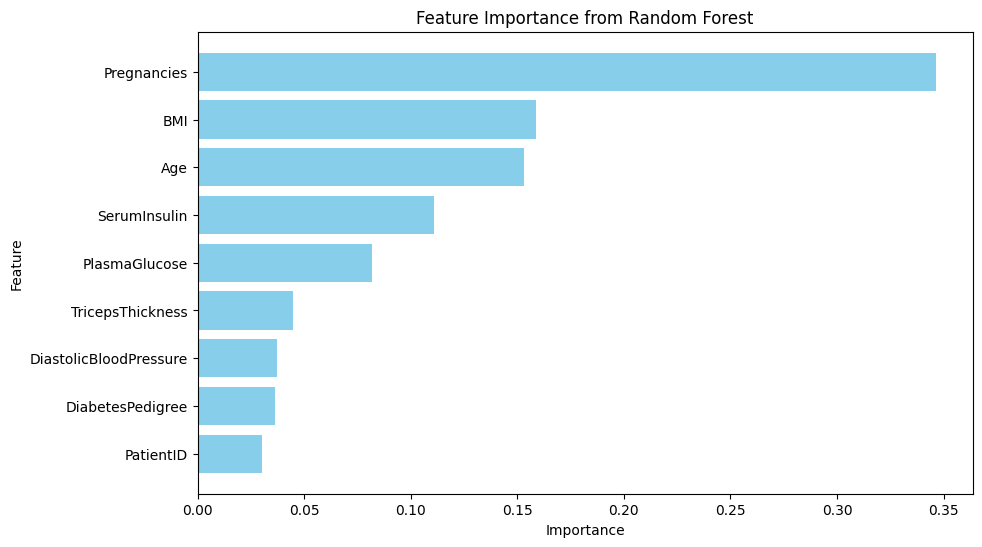

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

TARGET_COLUMN = 'Diabetic'

# Split features and target
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train_scaled, y_train)

# Feature importance
feature_importances = clf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()


## **Model training**

**using k-fold cross validation**

**cross_val_score:** This function performs cross-validation by splitting the dataset into k folds. In this case, cv=10 specifies 10-fold cross-validation.

**scoring='accuracy':** This sets the metric used for evaluating the model's performance. You can change it to other metrics like precision, recall, or f1 if needed.

**cv_scores.mean():** This will give you the average accuracy across all folds.

**cv_scores.std():** This will provide the standard deviation of the accuracy across all folds, which gives an idea of how stable the model's performance is across different splits.

In [15]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features_to_keep = [
    'Pregnancies', 'BMI',
    'SerumInsulin', 'Age', 'DiastolicBloodPressure',
    'PlasmaGlucose', 'TricepsThickness', 'DiabetesPedigree'
]

X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

rf_model.fit(X_train, y_train)
print("Model training complete.")

joblib.dump(rf_model, 'random_forest_model_tuned.joblib')
print("Model saved as 'random_forest_model_tuned.joblib'")

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model training complete.
Model saved as 'random_forest_model_tuned.joblib'

Test Set Evaluation:
Accuracy: 0.9329

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3005
           1       0.91      0.88      0.90      1495

    accuracy                           0.93      4500
   macro avg       0.93      0.92      0.92      4500
weighted avg       0.93      0.93      0.93      4500

